In [1]:
# Imports
library(Seurat)
library(SingleCellExperiment)
library(SingleR)
library(celldex)    
library(ggplot2)
library(clustree)
library(gridExtra)
library(scDblFinder)

# Change setting for visualizing plots within VSCODE
options(repr.plot.width=20, repr.plot.height=12)

Warning message:
"package 'Seurat' was built under R version 4.4.2"
Loading required package: SeuratObject

Warning message:
"package 'SeuratObject' was built under R version 4.4.2"
Loading required package: sp

Warning message:
"package 'sp' was built under R version 4.4.2"

Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.4.2"

Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, 

In [2]:
# Function to use ScDblFinder to find doublets
remove_seurat_doublets <- function(seurat_object) {
    # To be able to use ScDBIFinder, we need to convert it to SCE
    sce_object <- as.SingleCellExperiment(seurat_object)
    
    # Run scDblFinder function
    sce_object <- scDblFinder(sce_object)

    # View table
    table(sce_object$scDblFinder.class)

    # as.Seurat needs logcounts but we dont want to calculate log counts, to trick we assume sce logcounts = counts
    logcounts(sce_object) <- assay(sce_object, "counts")

    # Convert SCE object back to Seurat
    seurat_object <- as.Seurat(sce_object)
    seurat_object <- subset(seurat_object, subset = scDblFinder.class == "singlet")
    seurat_object[["RNA"]] <- as(seurat_object[["RNA"]], "Assay5")
    return(seurat_object)
}

In [3]:
# Set wd
setwd("C:/Users/phili/Desktop/BMW Jaar 3/Afstudeerscriptie/project_scriptie/Data/R Objects/Raw Seurat R Objects")
list.files()
getwd()

# Change setting for visualizing plots within VSCODE
options(repr.plot.width=20, repr.plot.height=12)

# Read datasets
horstmann <- readRDS("Horstmann_raw.rds")
fernandez <- readRDS("Fernandez_raw.rds")
menno <- readRDS("Menno_raw.rds")
bashore <- readRDS("Bashore_raw.rds")
Dib <- readRDS("Dib_raw.rds")

# Dib RDS object was converted to v3 instead of v5 by schard
Dib <- UpdateSeuratObject(Dib)

# Split by patient
splitted_dib <- SplitObject(Dib, split.by = "patient")

# Assign patient objects 
splitted_dib$P1$orig.ident <- "Dib et al. (2022), P1"
splitted_dib$P2$orig.ident <- "Dib et al. (2022), P2"
splitted_dib$P3$orig.ident <- "Dib et al. (2022), P3"
splitted_dib$P5$orig.ident <- "Dib et al. (2022), P5"
splitted_dib$P6$orig.ident <- "Dib et al. (2022), P6"
splitted_dib$P7$orig.ident <- "Dib et al. (2022), P7"

# Merge the Seurat objects
dib <- merge(splitted_dib$P1, y=list(splitted_dib$P2, splitted_dib$P3, splitted_dib$P5, splitted_dib$P6, splitted_dib$P7))

[1] "all_mice_macrophages_annotated.rds"         
 [2] "all_mice_myeloid_data.rds"                  
 [3] "Bashore_raw.rds"                            
 [4] "Cochaine_raw.rds"                           
 [5] "Cochaine_raw_modified_orig.rds"             
 [6] "Dib_and_Horstmann_macrophages_annotated.rds"
 [7] "Dib_macrophages_annotated.rds"              
 [8] "Dib_raw.rds"                                
 [9] "Fernandez_raw.rds"                          
[10] "Horstmann_macrophages_annotated.rds"        
[11] "Horstmann_raw.rds"                          
[12] "Menno_raw.rds"                              
[13] "Vafadarnejad_raw.rds"                       
[14] "Vafadarnejad_raw_modified_orig.rds"         
[15] "Winkels_raw.rds"                            
[16] "Winkels_raw_modified_orig.rds"

[1] "C:/Users/phili/Desktop/BMW Jaar 3/Afstudeerscriptie/project_scriptie/Data/R Objects/Raw Seurat R Objects"

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Validating object structure for Assay 'RNA'

Object representation is consistent with the most current Seurat version



In [ ]:
# Removing Doublets (These steps have to be chunked, because my laptop will crash if I don't do it)
dib <- remove_seurat_doublets(dib)
fernandez <- remove_seurat_doublets(fernandez)
bashore <- remove_seurat_doublets(bashore)

Warning message in .checkSCE(sce, coerce = is.null(samples)):
"Some cells in `sce` have an extremely low read counts; note that these could trigger errors and might best be filtered out"
Warning message in scDblFinder(sce_object):
"You are trying to run scDblFinder on a very large number of cells. If these are from different captures, please specify this using the `samples` argument.TRUE"
Creating ~25000 artificial doublets...

Dimensional reduction

Evaluating kNN...

Training model...

iter=0, 6765 cells excluded from training.

iter=1, 7367 cells excluded from training.

iter=2, 7466 cells excluded from training.

Threshold found:0.424

4680 (13.6%) doublets called

Warning message:
"Assay RNA changing from Assay to Assay5"
Warning message:
"Layer 'data' is empty"
Warning message:
"Layer 'scale.data' is empty"
Creating ~4544 artificial doublets...

Dimensional reduction

Evaluating kNN...

Training model...

iter=0, 573 cells excluded from training.

iter=1, 526 cells excluded from 

In [ ]:
# Removing doublets
menno <- remove_seurat_doublets(menno)

Warning message:
"Layer 'data' is empty"
Warning message:
"Layer 'scale.data' is empty"
Warning message in .checkSCE(sce, coerce = is.null(samples)):
"Some cells in `sce` have an extremely low read counts; note that these could trigger errors and might best be filtered out"
Warning message in scDblFinder(sce_object):
"You are trying to run scDblFinder on a very large number of cells. If these are from different captures, please specify this using the `samples` argument.TRUE"
Creating ~25000 artificial doublets...

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 3.7 GiB"
Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 3.8 GiB"
Dimensional reduction

Evaluating kNN...

Training model...

iter=0, 313026 cells excluded from training.

iter=1, 312254 cells excluded from training.

iter=2, 312254 cells excluded from training.

Threshold found:1

309896 (31.2%) doublets called

Warning message:
"Assay RNA changing

In [7]:
saveRDS(menno, "menno_raw_postdoublet.rds")

In [8]:
# Removing doublets
horstmann <- remove_seurat_doublets(horstmann)

Warning message:
"Layer 'data' is empty"
Warning message:
"Layer 'scale.data' is empty"
Warning message in scDblFinder(sce_object):
"You are trying to run scDblFinder on a very large number of cells. If these are from different captures, please specify this using the `samples` argument.TRUE"
Creating ~25000 artificial doublets...

Dimensional reduction

Evaluating kNN...

Training model...

iter=0, 8261 cells excluded from training.

iter=1, 8806 cells excluded from training.

iter=2, 8609 cells excluded from training.

Threshold found:0.388

5841 (15.8%) doublets called

Warning message:
"Assay RNA changing from Assay to Assay5"


In [5]:
# Split by layer
splitted_dib <- SplitObject(Dib, split.by = "patient")

# Assign patient objects 
dib_p1 <- splitted_dib$P1
dib_p2 <- splitted_dib$P2
dib_p3 <- splitted_dib$P3
dib_p5 <- splitted_dib$P5
dib_p6 <- splitted_dib$P6
dib_p7 <- splitted_dib$P7

In [10]:
# Merge the Seurat objects
samples <- merge(fernandez, y=list(horstmann, menno, bashore, dib)) #, dib_p1, dib_p2, dib_p3, dib_p5, dib_p6, dib_p7))

# Merge layers
samples[["RNA"]] <- JoinLayers(samples[["RNA"]], f = samples$orig.ident)

Warning message:
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."


In [18]:
unique(samples$orig.ident)

[1] "Fernandez et al. (2019), P1" "Fernandez et al. (2019), P2"
 [3] "Fernandez et al. (2019), P3" "Fernandez et al. (2019), P4"
 [5] "Fernandez et al. (2019), P5" "Fernandez et al. (2019), P6"
 [7] "Horstmann et al. (2023), P1" "Horstmann et al. (2023), P2"
 [9] "Horstmann et al. (2023), P3" "Horstmann et al. (2023), P4"
[11] "Horstmann et al. (2023), P5" "Horstmann et al. (2023), P6"
[13] "Horstmann et al. (2023), P7" "Horstmann et al. (2023), P8"
[15] "Depuydt et al. (2020), P3"   "Depuydt et al. (2020), P5"  
[17] "Depuydt et al. (2020), P7"   "Bashore et al. (2024), P4"  
[19] "Bashore et al. (2024), P6"   "Bashore et al. (2024), P9"  
[21] "Bashore et al. (2024), 13"   "Bashore et al. (2024), P14" 
[23] "Bashore et al. (2024), P15"  "Bashore et al. (2024), P16" 
[25] "Bashore et al. (2024), P17"  "Bashore et al. (2024), P18" 
[27] "Bashore et al. (2024), P19"  "Bashore et al. (2024), P20" 
[29] "Bashore et al. (2024), P21"  "Dib et al. (2022), P1"      
[31] "Dib et al. (2022), P2"       "Dib et al. (2022), P3"      
[33] "Dib et al. (2022), P5"       "Dib et al. (2022), P6"      
[35] "Dib et al. (2022), P7"

In [ ]:
# Preprocessing function which performs a basic workflow for scRNA seq analysis
pre_process <- function(data, nFeatures_RNA = 200, nCounts_RNA = 3, percents.mt = 15, pattern = "MT", resolutions = seq(0.5, 1.5, by = 0.1), k.weights = 100) {
    # Split
    data[["RNA"]] <- split(data[["RNA"]], f = data$orig.ident)

    # Get percentage mt                      
    data[["percent.mt"]] <- PercentageFeatureSet(data, pattern = sprintf("^%s-", pattern))

    # Subsets
    data <- subset(x = data, subset = nFeature_RNA >= nFeatures_RNA & nCount_RNA >= nCounts_RNA & percent.mt <= percents.mt)

    # Normalization
    data <- NormalizeData(data, normalization.method = "LogNormalize", scale.factor = 10000)
    
    # Find Variable features
    data <- FindVariableFeatures(data, selection.method = "vst", nfeatures = 2000)
    
    # Scale Data
    data <- ScaleData(data, vars.to.regress = c("percent.mt", "nFeature_RNA"))
    
    # Run PCA
    data <- RunPCA(data, npcs = 100, verbose=FALSE)

    # Get significant PCAs through Jackstrawplot
    data <- JackStraw(data, num.replicate = 100)
    data <- ScoreJackStraw(data, dims = 1:20)

    # Check the amount of significant pcs
    significant_pcs <- length(which(data@reductions$pca@jackstraw$overall.p.values < 0.05))

    # Run UMAP
    data <- RunUMAP(data, reduction = "pca", dims = 1:significant_pcs, reduction.name="umap_before_integration", verbose=FALSE)

    # Integrate # Replaced CCA by Harmony
    data <- IntegrateLayers(object = data, method = CCAIntegration, orig.reduction = "pca", new.reduction = "integrated.cca", k.weight = k.weights)

    data[["RNA"]] <- JoinLayers(data[["RNA"]])

    # Post integration processing
    data <- RunPCA(data, npcs = 100, verbose=FALSE)

    # Get significant PCAs through Jackstrawplot
    data <- JackStraw(data, num.replicate = 100)
    data <- ScoreJackStraw(data, dims = 1:20)

    # Check the amount of significant pcs
    significant_pcs <- length(which(data@reductions$pca@jackstraw$overall.p.values < 0.05))

    # Clustering
    data <- FindNeighbors(data, reduction = "integrated.cca", dims = 1:significant_pcs)
    data <- FindClusters(data, resolution = resolutions)
    data <- RunUMAP(data, dims = 1:significant_pcs, reduction = "integrated.cca", verbose=FALSE)

    return(data)
}

data <- pre_process(samples, pattern= "MT", percents.mt = 15)

In [ ]:
# Save integrated R object
saveRDS(data, file = "integrated_all_humans2.rds")

In [ ]:
# View amount of cells 
ncol(data)

[1] 110319

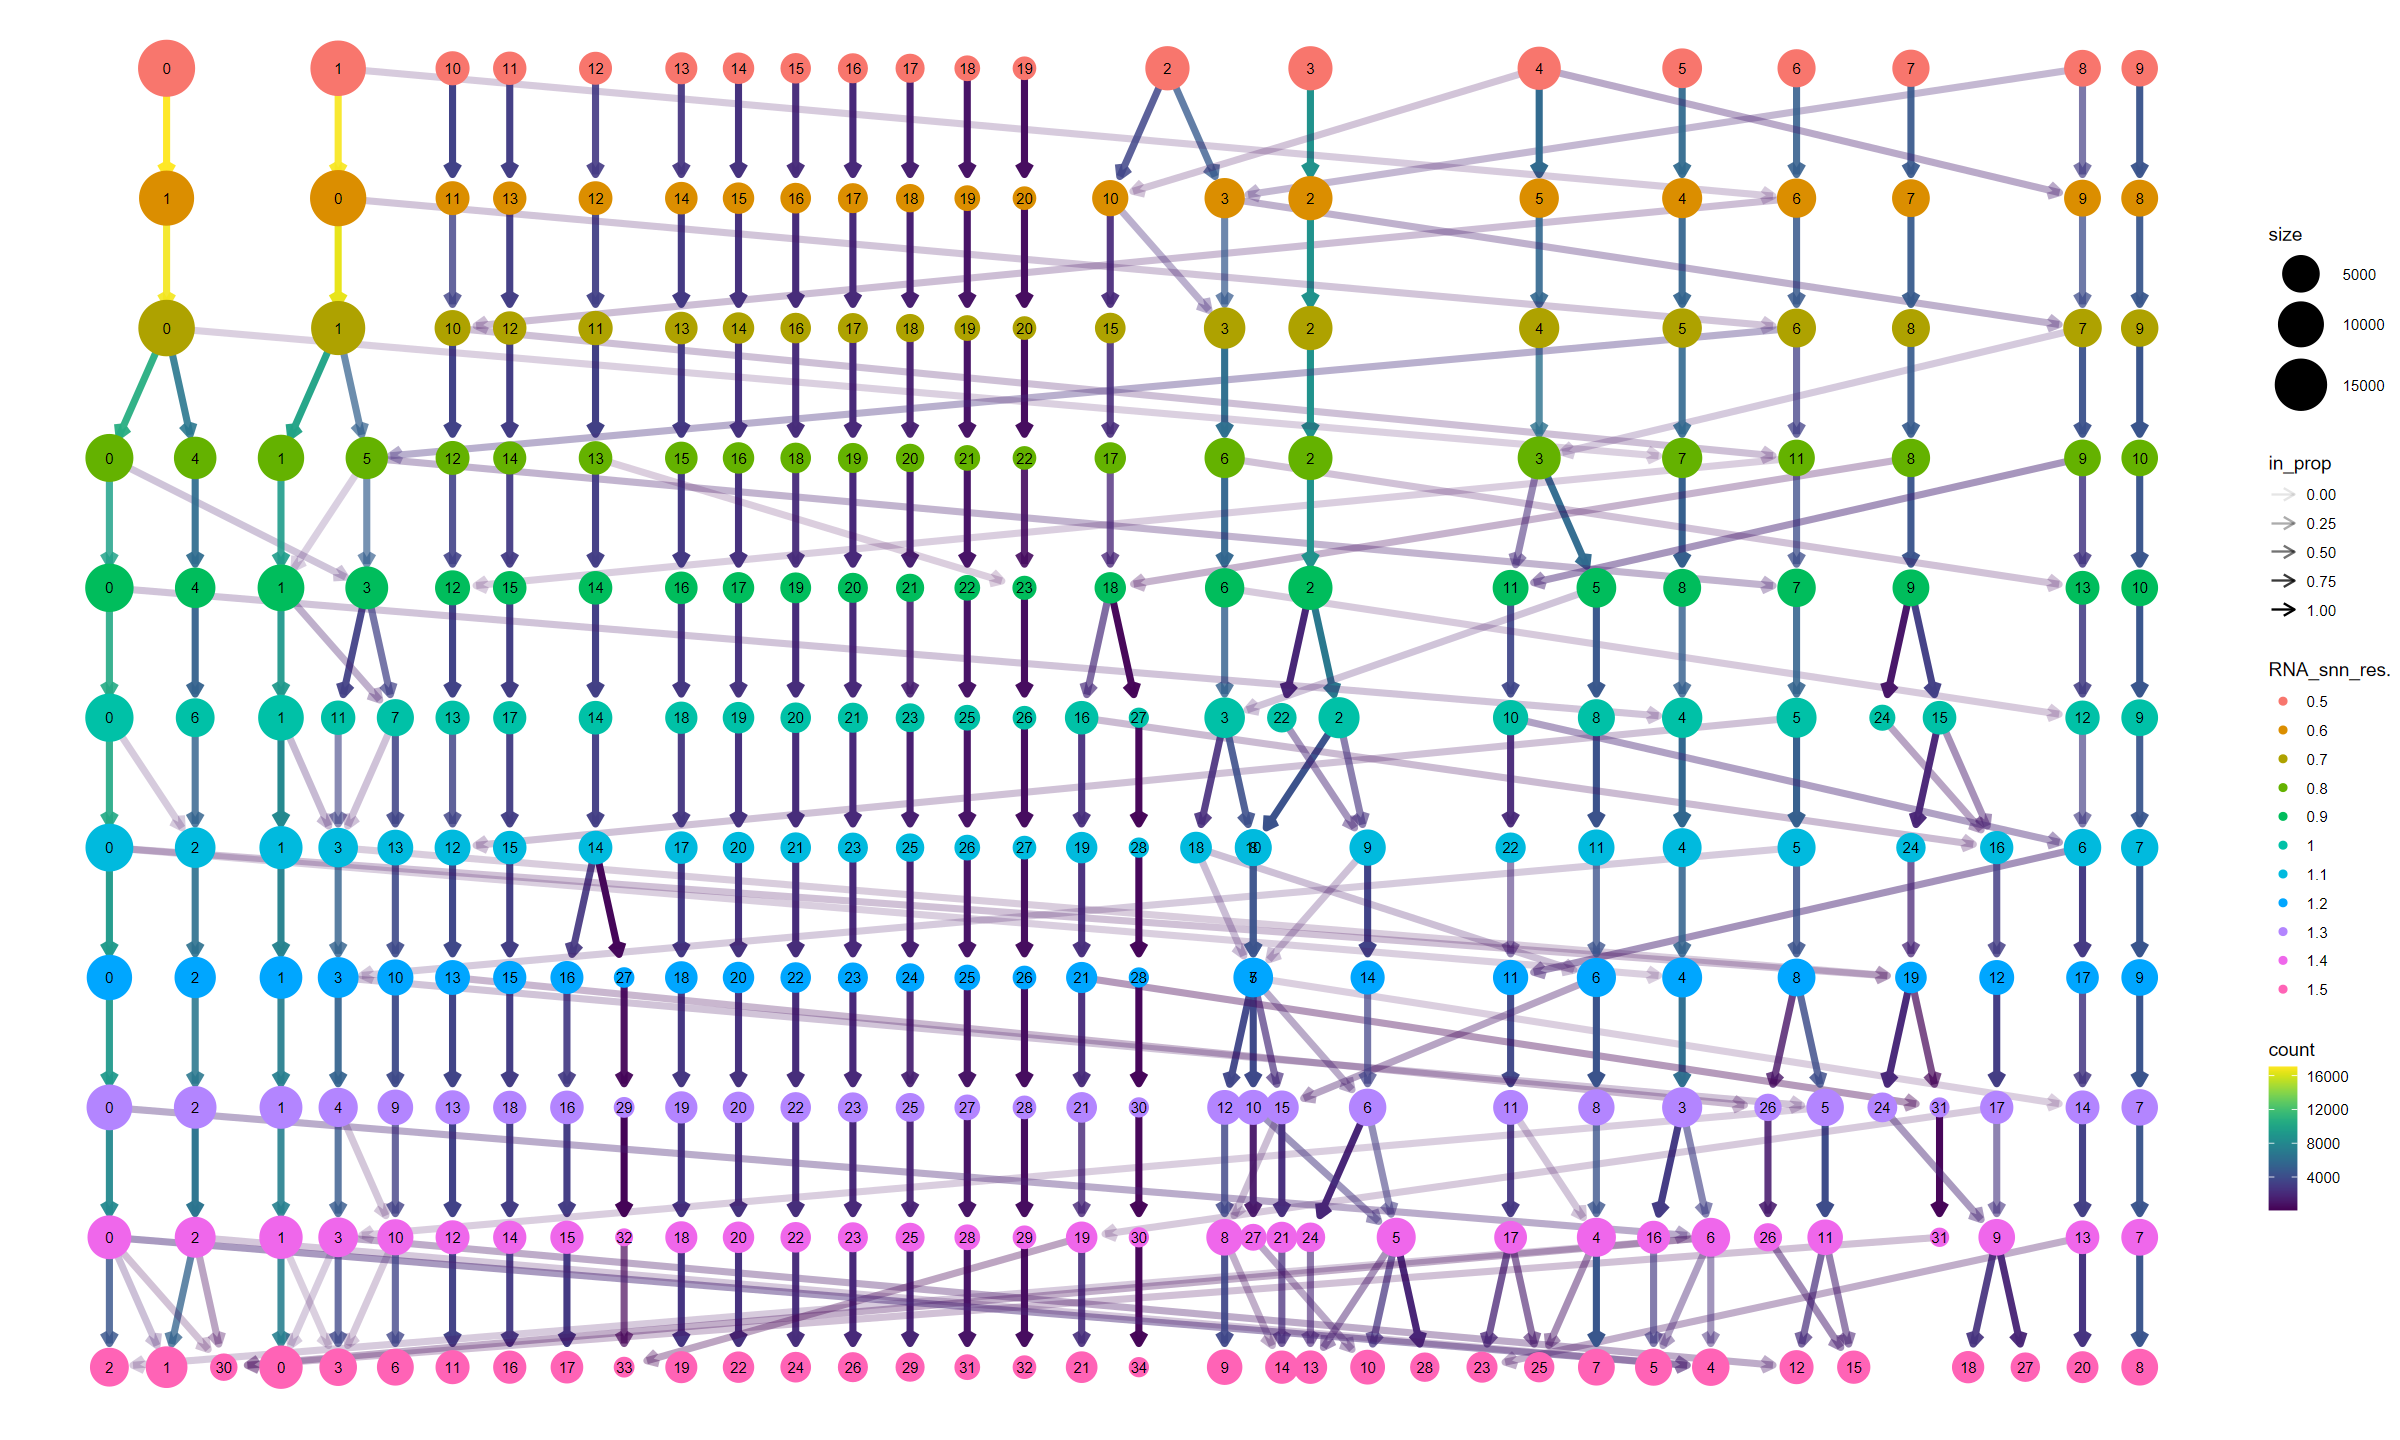

In [3]:
# This cell is meant to analyze the different resolutions and see which one is the best
clustree(data, prefix= "RNA_snn_res.", layout = "sugiyama")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



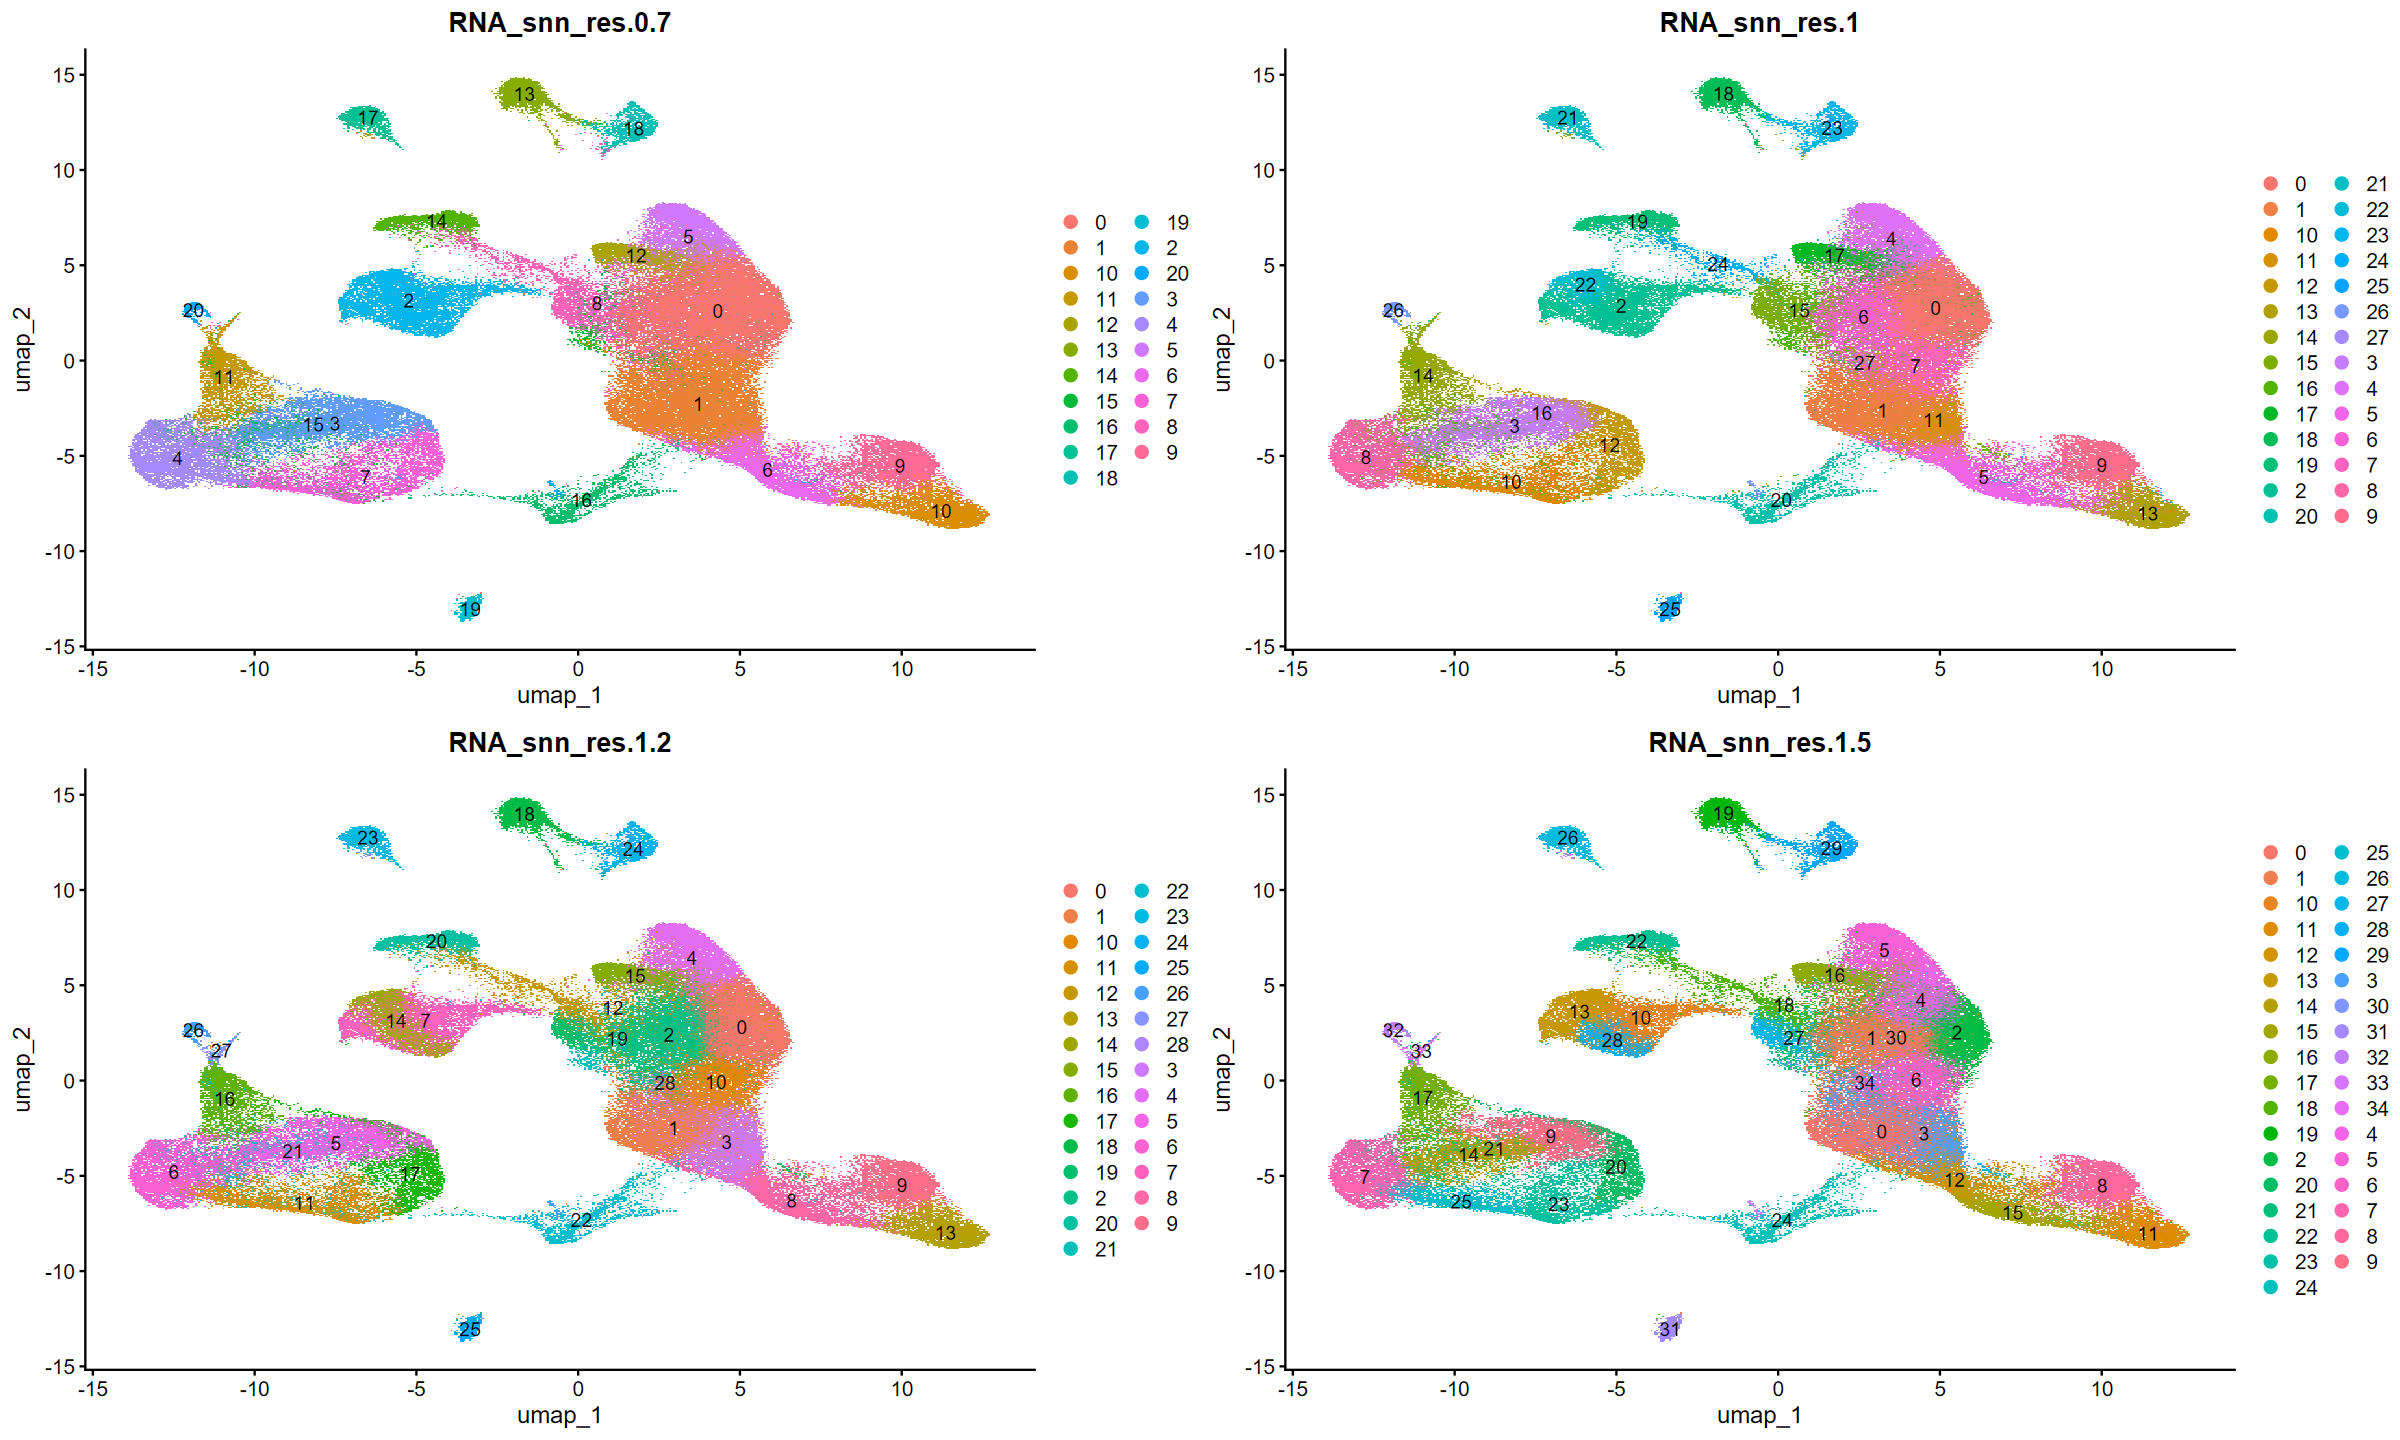

In [26]:
# Get DimPlots of different resolutions
res_1 <- DimPlot(data, reduction = "umap", group.by = "RNA_snn_res.0.7", label = T)
res_2 <- DimPlot(data, reduction = "umap", group.by = "RNA_snn_res.1", label = T)
res_3 <- DimPlot(data, reduction = "umap", group.by = "RNA_snn_res.1.2", label = T)
res_4 <- DimPlot(data, reduction = "umap", group.by = "RNA_snn_res.1.5", label = T)

# Plot
grid.arrange(res_1, res_2, res_3, res_4, ncol=2)

In [6]:
# Assign the slot "Seurat Cluster" to the desired resolution
data$seurat_clusters <- data$`RNA_snn_res.1`

,0,1,2,3,4,5,6,7,8,9,⋯,25,26,27,28,29,30,31,32,33,34
Adipocytes,0,3,9,1,0,9,3,0,1,0,⋯,0,18,3,88,23,0,2,1,0,1
Astrocytes,3,8,6,0,1,0,5,0,1,0,⋯,0,10,0,126,5,0,0,0,0,0
B-cells,0,1,0,0,0,0,0,0,0,0,⋯,0,979,29,0,1408,1,1,1,1,0
CD4+ T-cells,10,1929,1441,8,2607,4046,169,0,0,0,⋯,0,7,491,0,26,430,3,0,0,27
CD8+ T-cells,7965,5195,4125,4823,2322,700,4385,0,103,0,⋯,0,52,1072,1,102,831,5,12,0,193
Chondrocytes,9,3,5,1,0,0,0,0,0,0,⋯,0,6,6,105,13,2,0,0,0,1
DC,0,0,0,0,0,1,0,0,0,0,⋯,0,13,0,0,1,0,0,97,70,0
Endothelial cells,0,0,2,0,0,4,0,0,0,0,⋯,0,0,3,0,3,0,1,0,0,0
Eosinophils,1,7,0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,7,0,0,0
Erythrocytes,0,0,0,0,0,0,0,0,0,0,⋯,0,10,1,0,0,0,14,0,0,0


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



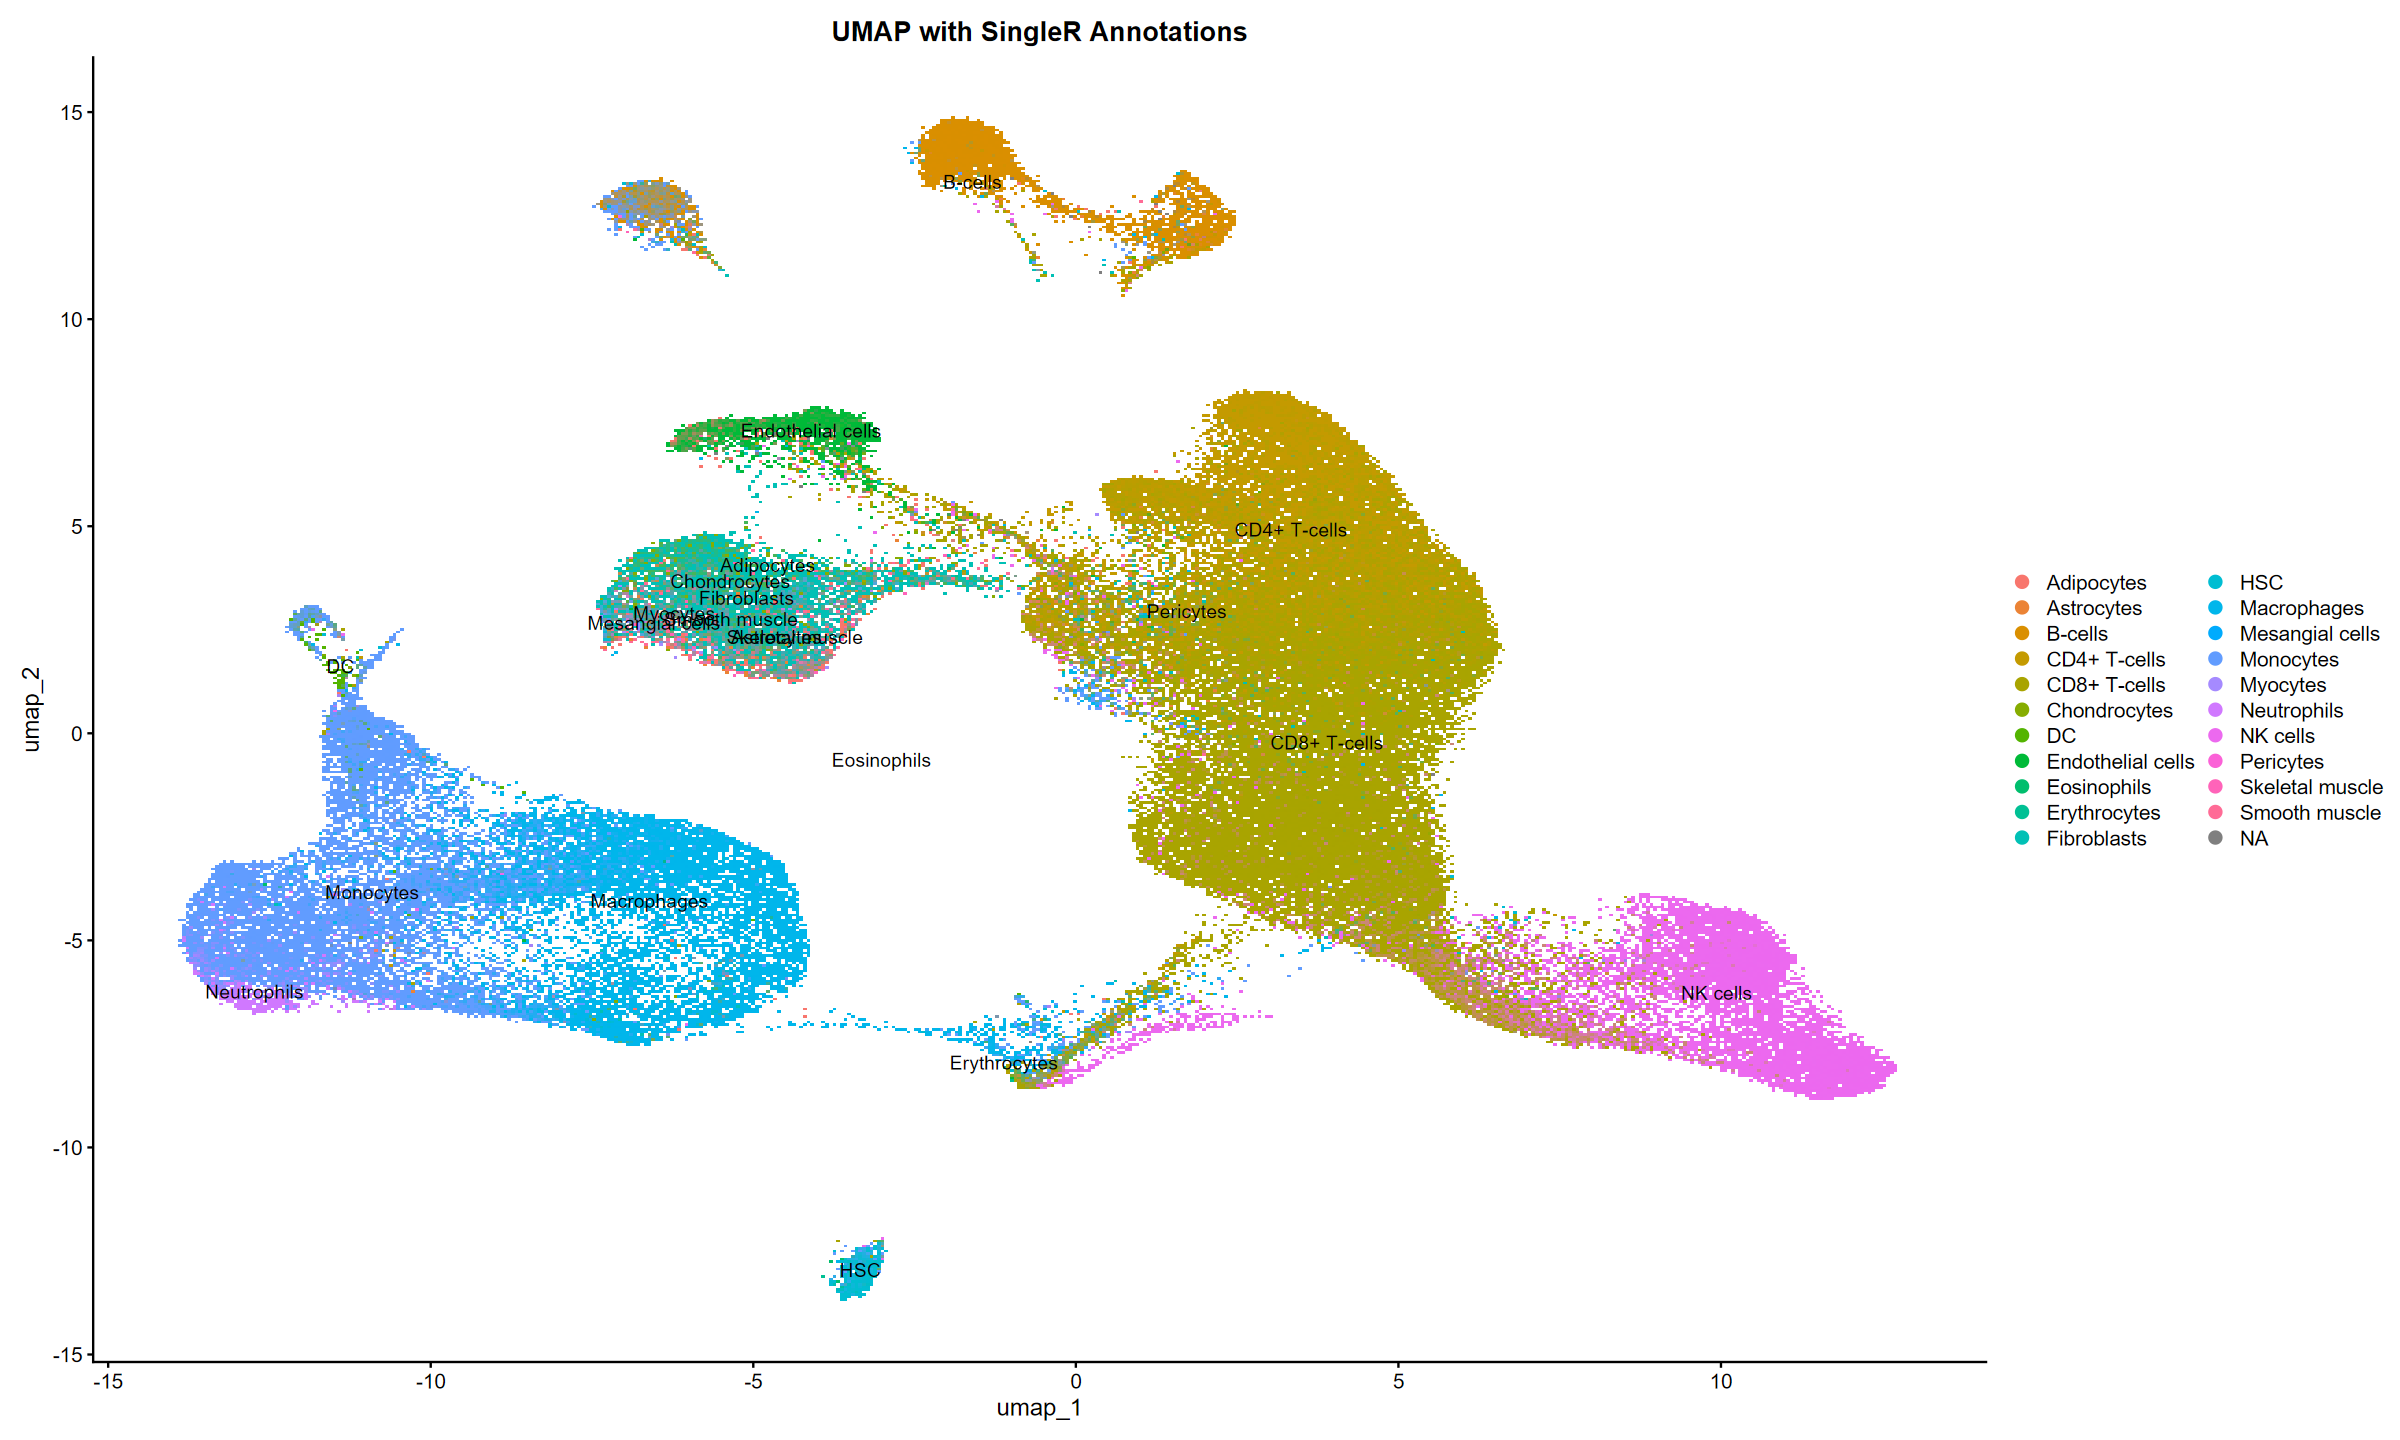

In [ ]:
# Annotation code block
# Get reference atlas
hpca.se <- celldex::BlueprintEncodeData()
data.sce <- as.SingleCellExperiment(data)

# Predict
pred.hpca <- SingleR(test = data.sce, ref = hpca.se, assay.type.test=1,
    labels = hpca.se$label.main)

# View annotations
cluster_table <- cbind(table(pred.hpca$pruned.labels, data.sce$seurat_clusters))
cluster_table

# Add SingleR predicted labels to Seurat metadata
data$SingleR_Labels <- pred.hpca$pruned.labels

# UMAP plot with SingleR labels
DimPlot(data, reduction = "umap", group.by = "SingleR_Labels", label = TRUE) + 
    ggtitle("UMAP with SingleR Annotations")

In [7]:
# Function to get myeloid cells
get_myeloids <- function(data, table, cell_types = c("Macrophages", "Monocytes", "DC")) {

    # Find clusters where atleast > 15% is classified as macrophages
    clusters <- which((colSums(cluster_table[rownames(cluster_table) %in% cell_types, ]) / colSums(cluster_table) * 100) > 50) - 1
    
    # Get subsets by first filtering on macrophage dominant clusters
    data <- subset(data, subset = seurat_clusters %in% names(clusters))

    # And then only select the myeloid_cells
    data <- subset(data, subset = SingleR_Labels %in% cell_types)

    return(data)
}

In [ ]:
# Get myeloid cells
myeloid_data <- get_myeloids(data)

Warning message:
"Removing 14 cells missing data for vars requested"


In [ ]:
# View number of myeloid cells
ncol(myeloid_data)

[1] 23601

In [ ]:
# View distribution of DC, macrophages & monocytes
table(myeloid_data$orig.ident, myeloid_data$SingleR_Labels)

                             
                                DC Macrophages Monocytes
  Bashore et al. (2024), 13      2         247        81
  Bashore et al. (2024), P14     0         634       338
  Bashore et al. (2024), P15     2         411       368
  Bashore et al. (2024), P16     2        1113       271
  Bashore et al. (2024), P17     1         681       348
  Bashore et al. (2024), P18     3         321        89
  Bashore et al. (2024), P19     3         736       307
  Bashore et al. (2024), P20     0         262        67
  Bashore et al. (2024), P21     5         547       342
  Bashore et al. (2024), P4      0         141        94
  Bashore et al. (2024), P6      6         959       786
  Bashore et al. (2024), P9     17         993      1173
  Depuydt et al. (2020), P3      4          22       110
  Depuydt et al. (2020), P5     15         112       420
  Depuydt et al. (2020), P7     23         256       580
  Dib et al. (2022), P1          0         154       346
 

In [ ]:
# Define %notin%
`%notin%` <- Negate(`%in%`)

[1] "Fernandez et al. (2019), P1" "Fernandez et al. (2019), P2"
 [3] "Fernandez et al. (2019), P3" "Fernandez et al. (2019), P4"
 [5] "Fernandez et al. (2019), P5" "Fernandez et al. (2019), P6"
 [7] "Horstmann et al. (2023), P1" "Horstmann et al. (2023), P2"
 [9] "Horstmann et al. (2023), P3" "Horstmann et al. (2023), P4"
[11] "Horstmann et al. (2023), P5" "Horstmann et al. (2023), P6"
[13] "Horstmann et al. (2023), P7" "Horstmann et al. (2023), P8"
[15] "Depuydt et al. (2020), P3"   "Depuydt et al. (2020), P5"  
[17] "Depuydt et al. (2020), P7"   "Bashore et al. (2024), P4"  
[19] "Bashore et al. (2024), P6"   "Bashore et al. (2024), P9"  
[21] "Bashore et al. (2024), 13"   "Bashore et al. (2024), P14" 
[23] "Bashore et al. (2024), P15"  "Bashore et al. (2024), P16" 
[25] "Bashore et al. (2024), P17"  "Bashore et al. (2024), P18" 
[27] "Bashore et al. (2024), P19"  "Bashore et al. (2024), P20" 
[29] "Bashore et al. (2024), P21"  "Dib et al. (2022), P1"      
[31] "Dib et al. (2022), P2"       "Dib et al. (2022), P3"      
[33] "Dib et al. (2022), P5"       "Dib et al. (2022), P6"      
[35] "Dib et al. (2022), P7"

In [ ]:
# Remove samples with less than 50 myeloid cells
myeloid_data <- subset(myeloid_data, subset = (orig.ident %notin% c(
    "Fernandez et al. (2019), P1", 
    "Horstmann et al. (2023), P1",
    "Horstmann et al. (2023), P2"
    )))

In [ ]:
# Process again
myeloid_data <- pre_process(myeloid_data, resolutions = seq(0.5, 1.5, by=0.1), k.weights=60)

Splitting 'counts', 'data' layers. Not splitting 'scale.data'. If you would like to split other layers, set in `layers` argument.

Normalizing layer: counts.Fernandez_et_al._2019,_P2

Normalizing layer: counts.Fernandez_et_al._2019,_P3

Normalizing layer: counts.Fernandez_et_al._2019,_P4

Normalizing layer: counts.Fernandez_et_al._2019,_P5

Normalizing layer: counts.Fernandez_et_al._2019,_P6

Normalizing layer: counts.Horstmann_et_al._2023,_P3

Normalizing layer: counts.Horstmann_et_al._2023,_P4

Normalizing layer: counts.Horstmann_et_al._2023,_P5

Normalizing layer: counts.Horstmann_et_al._2023,_P6

Normalizing layer: counts.Horstmann_et_al._2023,_P7

Normalizing layer: counts.Horstmann_et_al._2023,_P8

Normalizing layer: counts.Depuydt_et_al._2020,_P3

Normalizing layer: counts.Depuydt_et_al._2020,_P5

Normalizing layer: counts.Depuydt_et_al._2020,_P7

Normalizing layer: counts.Bashore_et_al._2024,_P4

Normalizing layer: counts.Bashore_et_al._2024,_P6

Normalizing layer: counts.Basho

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 23541
Number of edges: 945987

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8689
Number of communities: 14
Elapsed time: 5 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 23541
Number of edges: 945987

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8597
Number of communities: 16
Elapsed time: 5 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 23541
Number of edges: 945987

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8518
Number of communities: 19
Elapsed time: 6 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 23541
Number of edges: 945987

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8453
Number of communities: 20
Elapsed time: 5 seconds
Modularity O

In [12]:
saveRDS(myeloid_data, "all_humans_myeloid_data.rds")